# 02 - Clustering


In [9]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm

# Apply the default theme
sns.set_theme()


In [10]:
# import track data
df = pd.read_csv('./data/playlist_tracks.csv')
playlist_data = pd.read_csv('./data/playlists.csv')

# merging the playlist info
df = df.merge(playlist_data, on='playlist_id')
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/dc3f5560d882d3f9...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",True,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,https://p.scdn.co/mp3-preview/e54ac6ee0aa018cf...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,https://p.scdn.co/mp3-preview/bacd8fab60c68555...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill


In [11]:
# number of playlist
print('Number of playlists:', df['playlist_id'].nunique())

# number of tracks
print('Number of tracks:', df['id'].nunique())

Number of playlists: 5
Number of tracks: 562


## Preprocessing


In [19]:
# extracting meanginful features
df = df[['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'playlist_name']]
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,145599,86,0.853,0.6180,6,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,199680,44,0.642,0.7340,11,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,160000,51,0.624,0.7450,1,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,214000,82,0.704,0.7870,11,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,152347,58,0.741,0.1590,7,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,217798,41,0.584,0.1390,5,-11.483,1,0.0304,0.96100,0.03690,0.1060,0.240,106.759,4,Summer Jazz
558,290709,45,0.449,0.1420,10,-18.201,1,0.0421,0.94500,0.91400,0.1110,0.131,112.211,4,Summer Jazz
559,179160,37,0.555,0.0929,5,-17.157,0,0.0459,0.99500,0.75900,0.1050,0.642,69.861,3,Summer Jazz
560,289945,36,0.424,0.1030,3,-18.281,1,0.0417,0.93700,0.86100,0.1140,0.135,104.450,4,Summer Jazz


In [20]:
# Selecting the relevant audio features
features = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# saving to a dataframe
df_scaled = pd.DataFrame(X, columns=features)

# saving the playlist name as label
df_scaled['playlist_name'] = df['playlist_name']

df_scaled


,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,-1.372508,2.890909,2.238069,0.015723,0.245134,-0.285780,0.790112,0.124303,0.648691,1.445692,-0.664386,-0.024598,0.172846,0.291098,Electro chill
1,0.010270,-0.253799,0.743258,0.369810,1.701425,0.160059,-1.265643,-0.418177,-0.542437,-0.828959,0.751375,1.901968,-0.033884,0.291098,Electro chill
2,-1.004294,0.270319,0.615739,0.403388,-1.211158,0.532567,-1.265643,-0.346341,-0.461115,-0.828242,0.075942,-0.166721,-0.139970,0.291098,Electro chill
3,0.376413,2.591413,1.182492,0.531592,1.701425,0.377938,-1.265643,-0.446663,-0.843185,-0.820709,-0.255153,-0.077236,-0.035021,0.291098,Electro chill
4,-1.199971,0.794437,1.444615,-1.385364,0.536392,-1.374851,0.790112,0.076000,-0.662028,1.394452,-0.573003,0.891310,-0.207479,0.291098,Electro chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.473523,-0.478421,0.332362,-1.446413,-0.046125,-0.391468,0.790112,-0.642352,1.433208,-0.739955,-0.606113,-0.445705,-0.490949,0.291098,Summer Jazz
558,2.337759,-0.178925,-0.624033,-1.437256,1.410167,-1.483790,0.790112,-0.497443,1.394939,1.507180,-0.573003,-1.019463,-0.303163,0.291098,Summer Jazz
559,-0.514399,-0.777917,0.126914,-1.587133,-0.046125,-1.314040,-1.265643,-0.450379,1.514530,1.110069,-0.612735,1.670359,-1.761844,-2.435516,Summer Jazz
560,2.318225,-0.852791,-0.801144,-1.556303,-0.628641,-1.496798,0.790112,-0.502397,1.375805,1.371394,-0.553138,-0.998408,-0.570479,0.291098,Summer Jazz


In [28]:
from sklearn.cluster import KMeans

# the elbow method with WSS
inertia = []
cluster_range = range(1, 40)
for n_clusters in tqdm(cluster_range):
    # creating KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # fitting the model
    kmeans.fit(df_scaled.drop('playlist_name', axis=1))

    # saving to inertia
    inertia.append(kmeans.inertia_)


  0%|          | 0/39 [00:00<?, ?it/s]

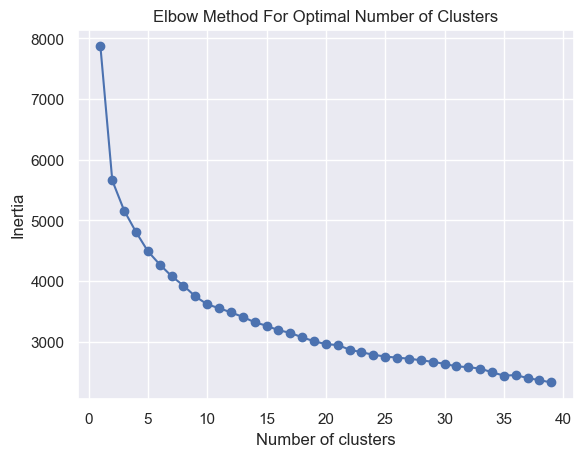

In [29]:
# Plot the inertia to find the elbow 
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [32]:
# we're gonna go with 5, it's a good inflection point and it's interesting to see how well we can rebuild the 5 initial playlists
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_pred = kmeans.fit_predict(df_scaled.drop('playlist_name', axis=1))
df_scaled['cluster'] = cluster_pred
df_scaled

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,cluster
0,-1.372508,2.890909,2.238069,0.015723,0.245134,-0.285780,0.790112,0.124303,0.648691,1.445692,-0.664386,-0.024598,0.172846,0.291098,Electro chill,3
1,0.010270,-0.253799,0.743258,0.369810,1.701425,0.160059,-1.265643,-0.418177,-0.542437,-0.828959,0.751375,1.901968,-0.033884,0.291098,Electro chill,2
2,-1.004294,0.270319,0.615739,0.403388,-1.211158,0.532567,-1.265643,-0.346341,-0.461115,-0.828242,0.075942,-0.166721,-0.139970,0.291098,Electro chill,0
3,0.376413,2.591413,1.182492,0.531592,1.701425,0.377938,-1.265643,-0.446663,-0.843185,-0.820709,-0.255153,-0.077236,-0.035021,0.291098,Electro chill,3
4,-1.199971,0.794437,1.444615,-1.385364,0.536392,-1.374851,0.790112,0.076000,-0.662028,1.394452,-0.573003,0.891310,-0.207479,0.291098,Electro chill,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.473523,-0.478421,0.332362,-1.446413,-0.046125,-0.391468,0.790112,-0.642352,1.433208,-0.739955,-0.606113,-0.445705,-0.490949,0.291098,Summer Jazz,1
558,2.337759,-0.178925,-0.624033,-1.437256,1.410167,-1.483790,0.790112,-0.497443,1.394939,1.507180,-0.573003,-1.019463,-0.303163,0.291098,Summer Jazz,1
559,-0.514399,-0.777917,0.126914,-1.587133,-0.046125,-1.314040,-1.265643,-0.450379,1.514530,1.110069,-0.612735,1.670359,-1.761844,-2.435516,Summer Jazz,4
560,2.318225,-0.852791,-0.801144,-1.556303,-0.628641,-1.496798,0.790112,-0.502397,1.375805,1.371394,-0.553138,-0.998408,-0.570479,0.291098,Summer Jazz,1


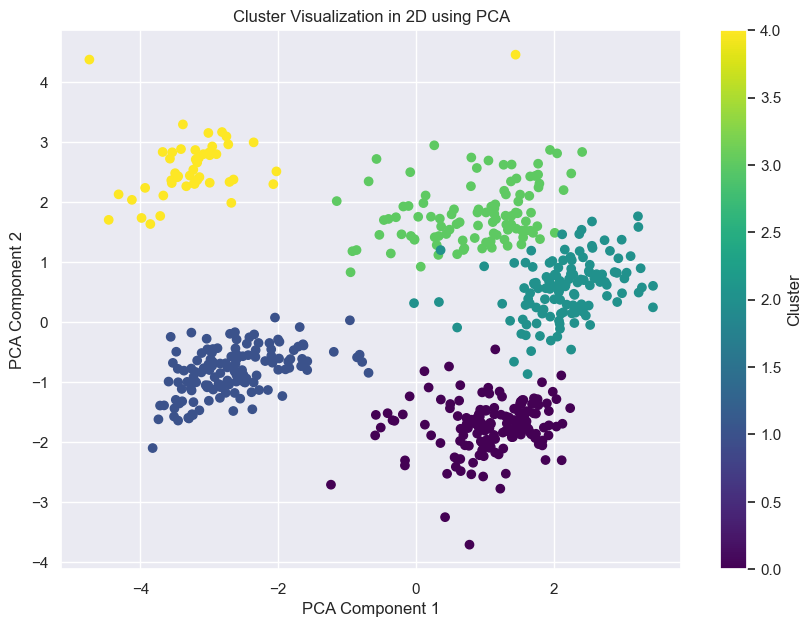

In [33]:
# quick visualization with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled.drop('playlist_name', axis=1))

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['cluster'], cmap='viridis')
plt.title('Cluster Visualization in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

/Users/paul/Desktop/spotify-autoplaylists/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/paul/Desktop/spotify-autoplaylists/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/paul/Desktop/spotify-autoplaylists/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/paul/Desktop/spotify-autoplaylists/venv

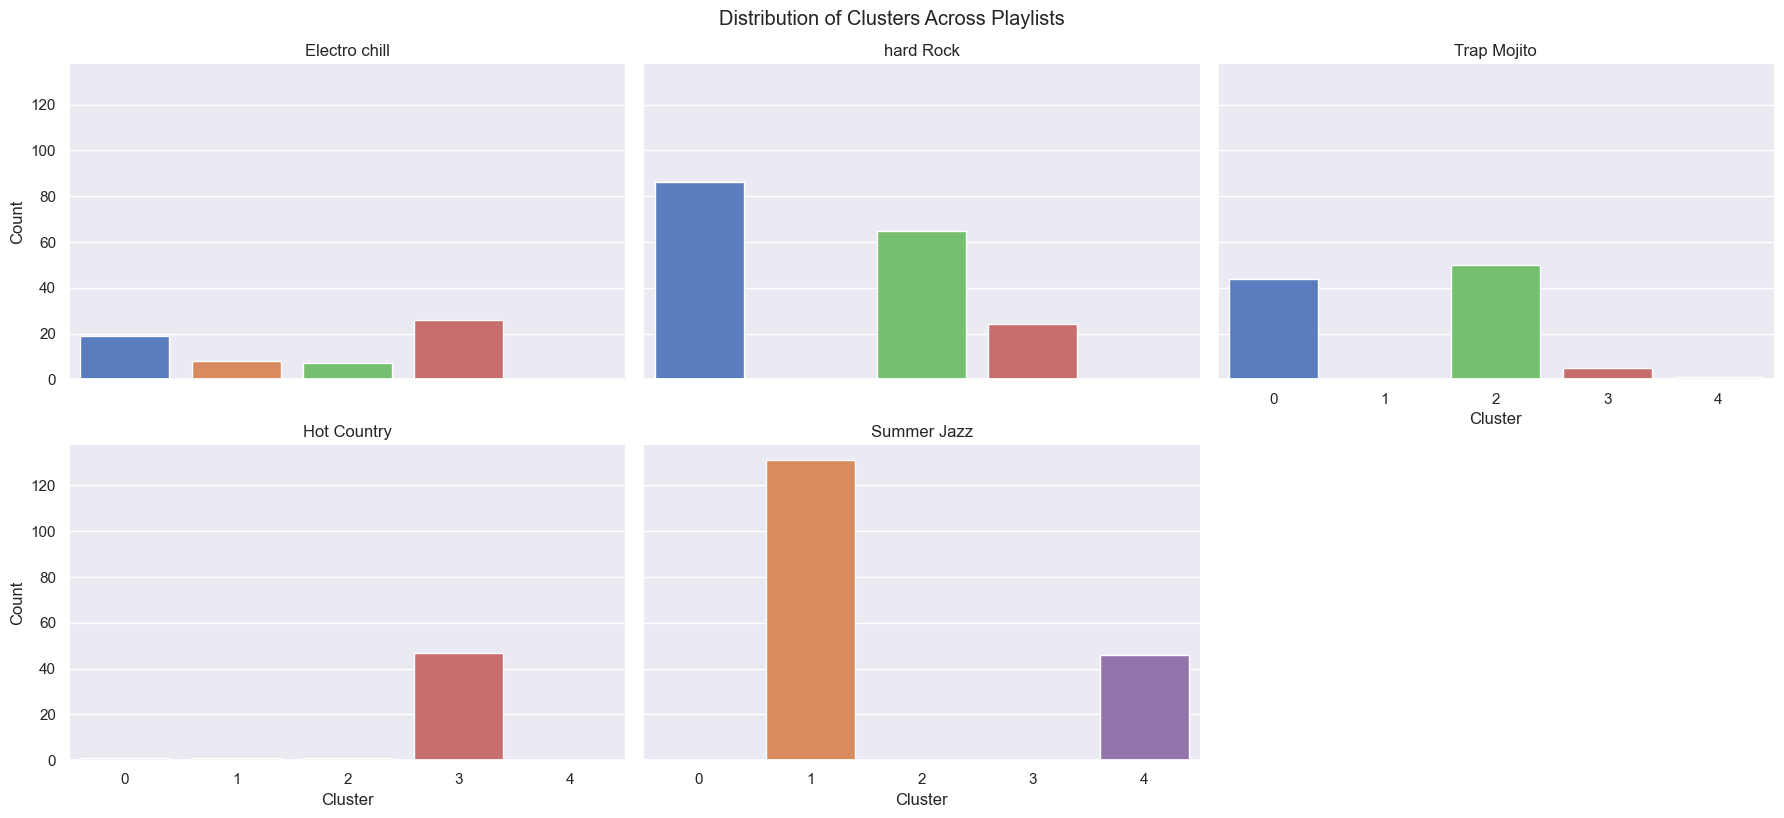

In [36]:
# let's plot the distribution of the clusters for each playlist
g = sns.FacetGrid(df_scaled, col="playlist_name", col_wrap=3, height=4, aspect=1.5)

# Map the countplot to each facet
g.map(sns.countplot, 'cluster', order=sorted(df_scaled['cluster'].unique()), palette="muted")

# Add titles and adjust the layout
g.set_axis_labels("Cluster", "Count")
g.set_titles("{col_name}")
g.fig.suptitle("Distribution of Clusters Across Playlists", y=1.02)

plt.show()

This little example shows that using audio features exlusively is not enough to clearly identify category of track and select for playlist
